In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("./Data/nbaSalary_train.csv")
dataframe.head()

,Unnamed: 0,X,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_feet,Height_in,Height_inches
0,1,0,Avery Bradley,Boston Celtics,0.0,PG,25.0,06-Feb,180.0,Texas,7730337.0,6.0,2.0,74
1,2,1,Jae Crowder,Boston Celtics,99.0,SF,25.0,06-Jun,235.0,Marquette,6796117.0,6.0,6.0,78
2,3,2,John Holland,Boston Celtics,30.0,SG,27.0,06-May,205.0,Boston University,NaN,6.0,5.0,77
3,4,3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,06-May,185.0,Georgia State,1148640.0,6.0,5.0,77
4,5,4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,06-Oct,231.0,NaN,5000000.0,6.0,10.0,82


In [3]:
dataframe = dataframe.drop('Unnamed: 0', 1) #drop useless index col
dataframe = dataframe.drop('Height', 1) #height col is wrong
dataframe.head()

,X,Name,Team,Number,Position,Age,Weight,College,Salary,Height_feet,Height_in,Height_inches
0,0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,Texas,7730337.0,6.0,2.0,74
1,1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,Marquette,6796117.0,6.0,6.0,78
2,2,John Holland,Boston Celtics,30.0,SG,27.0,205.0,Boston University,NaN,6.0,5.0,77
3,3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,Georgia State,1148640.0,6.0,5.0,77
4,4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,NaN,5000000.0,6.0,10.0,82


# Missing values

In [4]:
dataframe.isnull().values.any() #check for nulls

True

In [5]:
dataframe['College'].isnull().values.any() #check college for nulls

True

In [6]:
# print what columns have null values
dataframe.loc[:, dataframe.isnull().any()].columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College',
       'Salary', 'Height_feet', 'Height_in'],
      dtype='object')

In [7]:
dataframe.isna().sum() #count of nulls for features

X                 0
Name              1
Team              1
Number            1
Position          1
Age               1
Weight            1
College          77
Salary            9
Height_feet       1
Height_in         1
Height_inches     0
dtype: int64

In [8]:
# Salary is the dependent variable, there are 9 records with this info missing, what proportion is this?
total_records = len(dataframe['X'])
salary_missing_proportion = (9 / total_records) * 100
print(salary_missing_proportion)

2.3872679045092835


In [9]:
#from above, will delete records with null salary values, they account for a negligible amount of records
#it is also not ideal to impute values for the dependent variable, training data can bleed into test data also
dataframe = dataframe[dataframe['Salary'].notna()]

In [10]:
#sanity check
print("Number of total records now: " + str(len(dataframe['X'])))
dataframe.isna().sum()

Number of total records now: 368


X                 0
Name              0
Team              0
Number            0
Position          0
Age               0
Weight            0
College          74
Salary            0
Height_feet       0
Height_in         0
Height_inches     0
dtype: int64

In [11]:
propotion_of_records_with_null_college = 74 / len(dataframe['X']) * 100
propotion_of_records_with_null_college

20.108695652173914

In [12]:
#Approximately 20% of records have missing college data, 
#too large a proportion to simply omit these records so will drop college feature for now
dataframe = dataframe.drop('College', 1)
dataframe.head()

,X,Name,Team,Number,Position,Age,Weight,Salary,Height_feet,Height_in,Height_inches
0,0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,7730337.0,6.0,2.0,74
1,1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,6796117.0,6.0,6.0,78
3,3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,1148640.0,6.0,5.0,77
4,4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,5000000.0,6.0,10.0,82
5,5,Amir Johnson,Boston Celtics,90.0,PF,29.0,240.0,12000000.0,6.0,9.0,81


In [13]:
print("Number of total records now: " + str(len(dataframe['X'])))
dataframe.isna().sum()

Number of total records now: 368


X                0
Name             0
Team             0
Number           0
Position         0
Age              0
Weight           0
Salary           0
Height_feet      0
Height_in        0
Height_inches    0
dtype: int64

In [14]:
#No null values now and still have approximately 98% of original records

# Numeric data


In [15]:
# not interested in one hot encdoing categorical variables
# want to create a simple model using the numerical data available
# this numeric data captures mostly everything about the player themself,

numeric_features = ['Age', 'Weight', 'Salary', 'Height_feet', 'Height_in', 'Height_inches', 'Number']
numeric_only_dataframe = dataframe[numeric_features]

In [16]:
numeric_only_dataframe.head()

,Age,Weight,Salary,Height_feet,Height_in,Height_inches,Number
0,25.0,180.0,7730337.0,6.0,2.0,74,0.0
1,25.0,235.0,6796117.0,6.0,6.0,78,99.0
3,22.0,185.0,1148640.0,6.0,5.0,77,28.0
4,29.0,231.0,5000000.0,6.0,10.0,82,8.0
5,29.0,240.0,12000000.0,6.0,9.0,81,90.0


In [17]:
correlation_matrix = numeric_only_dataframe.corr().round(3)
correlation_matrix 

#want to see how the variables correlate with one another
#see below that there are no 'strong' correlations with salary, bar 'age'.
#this indicates that linear regression is a poor model choice for this data set
#the inductive bias of linear regression assumes that some independent variables correlate in a strong way with the 
#dependent variable, 'salary'. (And that there is little to no multicollinearity between independent variables)

,Age,Weight,Salary,Height_feet,Height_in,Number
Age,1.000,0.105,0.266,-0.044,0.026,0.018
Weight,0.105,1.000,0.128,0.370,0.430,0.180
Salary,0.266,0.128,1.000,0.004,0.033,-0.100
Height_feet,-0.044,0.370,0.004,1.000,-0.524,0.149
Height_in,0.026,0.430,0.033,-0.524,1.000,0.090
Number,0.018,0.180,-0.100,0.149,0.090,1.000


<AxesSubplot:xlabel='Age'>

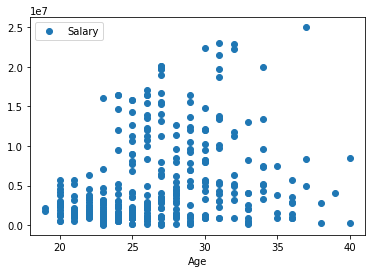

In [18]:
dataframe.plot(x='Age', y='Salary', style='o') # some correlation

<AxesSubplot:xlabel='Height_inches'>

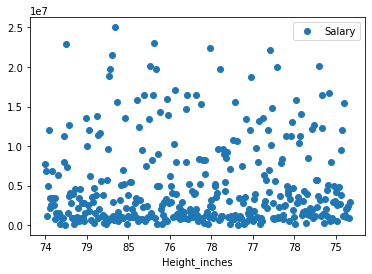

In [19]:
dataframe.plot(x='Height_inches', y='Salary', style='o') # little correlation

# Model with just initial numeric data

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train = numeric_only_dataframe.drop('Salary', 1)
y_train = dataframe['Salary']

X_train.head() # salary removed, don't want to include in training data

,Age,Weight,Height_feet,Height_in,Height_inches,Number
0,25.0,180.0,6.0,2.0,74,0.0
1,25.0,235.0,6.0,6.0,78,99.0
3,22.0,185.0,6.0,5.0,77,28.0
4,29.0,231.0,6.0,10.0,82,8.0
5,29.0,240.0,6.0,9.0,81,90.0


In [21]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
regressor.coef_

array([ 306718.66737032,   40525.93717113,  -10552.73983843,
        -13868.61457813, -140501.49263935,  -37867.97834714])

In [23]:
test_data = pd.read_csv("C:/Users/kingda/Downloads/test.csv")

In [24]:
numeric_only_test_df = test_data[numeric_features]
numeric_only_test_df.head()

,Age,Weight,Salary,Height_feet,Height_in,Height_inches,Number
0,21,235,1170960,6,8,80,55
1,22,190,1824360,6,2,74,12
2,20,215,1749840,6,6,78,13
3,23,175,1500000,5,11,71,0
4,28,275,19689000,7,0,84,11


In [25]:
y_test = numeric_only_test_df['Salary']

In [26]:
X_test= numeric_only_test_df.drop('Salary', axis=1)
X_test.head()

,Age,Weight,Height_feet,Height_in,Height_inches,Number
0,21,235,6,8,80,55
1,22,190,6,2,74,12
2,20,215,6,6,78,13
3,23,175,5,11,71,0
4,28,275,7,0,84,11


In [27]:
y_pred = regressor.predict(X_test) # use the test set features to create a prediction

In [28]:
from sklearn import metrics
import numpy as np

#error metrics to quantify the difference between y_test values and y_prediction values
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test Mean Absolute Error: 3694760.9358640206
Test Mean Squared Error: 22740261247369.527
Test Root Mean Squared Error: 4768674.999134406


In [29]:
test_data.isna().sum() #count of nulls for features, don't use college anyway

Unnamed: 0       0
X                0
Name             0
Team             0
Number           0
Position         0
Age              0
Height           0
Weight           0
College          8
Salary           0
Height_feet      0
Height_in        0
Height_inches    0
dtype: int64